# Programming in Python for Data Science 

# Assignment 8: A Slice of NumPy and Advanced Data Wrangling

You can't learn technical subjects without hands-on practice. The assignments are an important part of the course. To submit this assignment you will need to make sure that you save your Jupyter notebook. 

Below are the links of 2 videos that explain:

1. [How to save your Jupyter notebook](https://youtu.be/0aoLgBoAUSA) and,       
2. [How to answer a question in a Jupyter notebook assignment](https://youtu.be/7j0WKhI3W4s).       

### Assignment Learning Goals:

By the end of the module, students are expected to:

- Use [NumPy](https://numpy.org/) to create ndarrays with `np.array()` and from functions such as `np.arrange()`, `np.linspace()` and `np.ones()`.
- Describe the shape, dimension and size of an array.
- Identify null values in a dataframe and manage them by removing them using [`.dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) or replacing them using [`.fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).
- Manipulate non-standard date/time formats into standard Pandas datetime using [`pd.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).
- Find, and replace text from a dataframe using verbs such as [`.replace()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) and [`.contains()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html).  


This assignment covers [Module 8](https://prog-learn.mds.ubc.ca/en/module8) of the online course. You should complete this module before attempting this assignment.

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Substitute the `None` and the `raise NotImplementedError # No Answer - remove if you provide an answer` with your completed code and answers then proceed to run the cell!

Note that some of the questions in this assignment will have hidden tests. This means that no feedback will be given as to the correctness of your solution. It will be left up to you to decide if your answer is sufficiently correct. These questions are worth 2 points.

In [1]:
# Import libraries needed for this lab
import pandas as pd
import numpy as np
import test_assignment8 as t
from hashlib import sha1
import altair as alt
import inspect

## 1.  Using NumPy 

**Question 1(a)** <br> {points: 1}  

Create a slice from `arr` named `answer_1a` of the values `[1,5,9]`.

In [2]:
arr = np.arange(1, 11)
answer_1a = arr[-11:9:4]

In [3]:
t.test_1a(answer_1a)

'Success'

**Question 1(b)** <br> {points: 1}  

Create a 2d array named `answer_1b` of shape (2,2) filled with value 3.4 using `np.full()`.

In [4]:
answer_1b = np.full((2,2), 3.4)

In [5]:
t.test_1b(answer_1b)

'Success'

**Question 1(c)** <br> {points: 1}  

Create a 3d array named `answer_1c` of shape (2, 3, 4) using `np.ones()`.

In [6]:
answer_1c = np.ones((2, 3, 4))

In [7]:
t.test_1c(answer_1c)

'Success'

**Question 1(d)** <br> {points: 2}  

Which of the following arrays are two dimensional? 

 `array_1 = np.array([1, 4, 5, 6])`

 `array_2 = np.array([[1, 4, 5, 6]])`

 `array_3 = np.array([[1], [4], [5], [6]])`

 `array_4 = np.array([[[1, 4]], [[5, 6]]])`

Save all possible answers as strings within a list.      
Remember you can chose from the following data types:  

***Example:***    

`answer1_d = ['array_1', 'array_2']`


In [8]:
answer1_d = ['array_2', 'array_3']

In [9]:
# check that the function exists
assert 'answer1_d' in globals(
), "Please make sure that your solution is named 'answer1_d'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

## 2. DateTime Wrangling 

<a href="https://en.wikipedia.org/wiki/Chopped_(TV_series)" target="_blank">Chopped</a> is a cooking show aired in North America where 4 contestants must prepare a dish that incorporates unusual basket ingredients unknown to the contestants beforehand. The dishes are then presented to a panel of three celebrity chef judges where the contestant of the least liked dish is "chopped" from the competition. There are 3 rounds in the contest ("Appetizer", "Entrée", and "Dessert") and the winner of the final round is deemed the "Chopped Champion". 

[This Chopped open-source dataset](https://www.kaggle.com/jeffreybraun/chopped-10-years-of-episode-data) combines allows us to identify some insights into this popular TV series. 


**Question 2(a)** <br> {points: 1}  

Load in the data, assigning the `air_date` column as  `Datetime64` dtype.     
Save the dataframe as an object named `chopped`.

In [10]:
chopped = pd.read_csv('data/chopped.csv')
chopped['air_date'] = pd.to_datetime(chopped['air_date'])
chopped

,season,season_episode,series_episode,episode_name,episode_notes,air_date,judge1,judge2,judge3,appetizer,entree,dessert,contestant1,contestant1_info,contestant2,contestant2_info,contestant3,contestant3_info,contestant4,contestant4_info
0,1,1,1,"""Octopus, Duck, Animal Crackers""",This is the first episode with only three offi...,2009-01-13,Marc Murphy,Alex Guarnaschelli,Aarón Sánchez,"baby octopus, bok choy, oyster sauce, smoked ...","duck breast, green onions, ginger, honey","prunes, animal crackers, cream cheese",Summer Kriegshauser,Private Chef and Nutrition Coach New York NY,Perry Pollaci,Private Chef and Sous chef Bar Blanc New Yo...,Katie Rosenhouse,Pastry Chef Olana Restaurant New York NY,Sandy Davis,Catering Chef Showstoppers Catering at Union...
1,1,2,2,"""Tofu, Blueberries, Oysters""",This is the first of a few episodes with five ...,2009-01-20,Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,"firm tofu, tomato paste, prosciutto","daikon, pork loin, Napa cabbage, Thai chiles,...","phyllo dough, gorgonzola cheese, pineapple ri...",Raymond Jackson,Private Caterer and Culinary Instructor West...,Klaus Kronsteiner,Chef de cuisine Liberty National Golf Course...,Christopher Jackson,Executive Chef and Owner Ted and Honey Broo...,Pippa Calland,Owner and Chef Chef for Hire LLC Newville PA
2,1,3,3,"""Avocado, Tahini, Bran Flakes""",NaN,2009-01-27,Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,"lump crab meat, dried shiitake mushrooms, pin...","ground beef, cannellini beans, tahini paste, ...","brioche, cantaloupe, pecans, avocados",Margaritte Malfy,Executive Chef and Co-owner La Palapa New Y...,Rachelle Rodwell,Chef de cuisine SoHo Grand Hotel New York NY,Chris Burke,Private Chef New York NY,Andre Marrero,Chef tournant L’Atelier de Joël Robuchon Ne...
3,1,4,4,"""Banana, Collard Greens, Grits""","In the appetizer round, Chef Chuboda refused t...",2009-02-03,Scott Conant,Amanda Freitag,Geoffrey Zakarian,"ground beef, wonton wrappers, cream of mushro...","scallops, collard greens, anchovies, sour cream","maple syrup, black plums, almond butter, waln...",Sean Chudoba,Executive Chef Ayza Wine Bar New York NY,Kyle Shadix,Chef Registered Dietician and Culinary Consu...,Luis Gonzales,Executive Chef Knickerbocker Bar & Grill Ne...,Einat Admony,Chef and Owner Taïm New York NY
4,1,5,5,"""Yucca, Watermelon, Tortillas""",NaN,2009-02-10,Geoffrey Zakarian,Alex Guarnaschelli,Marc Murphy,"watermelon, canned sardines, pepper jack chee...","beef shoulder, yucca, raisins, ancho chiles, ...","flour tortillas, prosecco, Canadian bacon, ro...",John Keller,Personal Chef New York NY,Andrea Bergquist,Executive Chef New York NY,Ed Witt,Executive Chef / Wine Director Bloomingdale ...,Josh Emett,Chef de cuisine Gordon Ramsay at The London ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,45,9,563,"""Terrine Cuisine""",Chef Jose cut himself in the first round and c...,2020-06-23,Chris Santos,Scott Conant,Erik Ramirez,"rabbit terrine, guanciale, spring garlic, bur...","beer ramen, sablefish, corn on the cob, lemon...","feta ice cream, pears, blueberry ketchup, cho...",Jose Luis Chavez,Chef and Owner from New York NY,Matt Greiner,Executive Chef from Raleigh NC,Mimi Weissenborn,Executive Chef from Harlem NY,Nemo Bolin,Chef and Owner from Providence RI
565,45,10,564,"""Time and Turmoil""",Chef Arden forgot an ingredient in the first r...,2020-06-30,Amanda Freitag,Maneet Chauhan,Scott Conant,"hash brown patties, Manila clams, escarole, b...","dried cuttlefish, sweetbreads, kohlrabi, beet...","boozy cranberry gelatin, cherry scones, necta...",Lindsay Smith-Rosales,Chef and Owner from Laguna Beach CA,Arden Lewis,Executive Chef from New York NY,Lina Zarcaro,Private Chef from Bradley Beach NJ,Luca Annunziata,Executive Chef from Charlotte NC
566,45,11,565,"""Jarring Jars""",The guest judge in this episode was Chef Ray G...,2020-07-07,Scott Conant,Geoffrey Zakarian,Ray Garcia,"sea beans, dehydrated carrot sticks, egg coff...","lo 

In [11]:
t.test_2a(chopped)

'Success'

**Question 2(b)** <br> {points: 2}  

Determine how long the show been airing for (in years) by looking at the earliest and latest air dates.

Save the result as an object named `air_length_yrs`. 

In [12]:
air_length_yrs = None 
days_per_year = 365.25 # This is the total number of days per year including 0.25 to account for the leap year.


air_length_yrs = (chopped['air_date'].max() - chopped['air_date'].min()).days / days_per_year


air_length_yrs = round(air_length_yrs, 2) # This will round your answer to 2 decimal places. Do not delete! 
air_length_yrs

11.56

In [13]:
# check that the function exists
assert 'air_length_yrs' in globals(
), "Please make sure that your solution is named 'air_length_yrs'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question 2(c)** <br> {points: 1}  

How many days are between each of the 569 episodes?  
Save this as an object named `days_apart`. 

*Hints:* 
- You may need to use `.diff()` and `days_apart` should have 568 rows.        
- Here you are measuring time between episodes. `diff()` produces a dataframe that have a `NaT` value for the first row since there is no episode before it to calculate an interval from. We need to remove this row. Although there are 569 episodes, the number of intervals *between* episodes is 568.  


In [14]:
days_apart = chopped['air_date'].diff()[1:]
days_apart

1      7 days
2      7 days
3      7 days
4      7 days
5      7 days
        ...  
564    7 days
565    7 days
566    7 days
567   14 days
568    7 days
Name: air_date, Length: 568, dtype: timedelta64[ns]

In [15]:
t.test_2c(days_apart)

'Success'

**Question 2(d)** <br> {points: 1}  

Of these inter-episode intervals, what fraction of them were not aired on a weekly basis? 

Save the result in an object named `irregular_aired_fraction`.


In [16]:
irregular_aired_count = 0

for day in days_apart:
    if (day.days != 7):
        irregular_aired_count += 1
    
irregular_aired_fraction = irregular_aired_count / days_apart.count()

In [17]:
t.test_2d(irregular_aired_fraction)

'Success'

**Question 2(e)** <br> {points: 1}  

Make a new dataframe named `chopped2` that contains an additional column named `weekday_aired` that specifies the day of the week that it was aired.

*Hint: you'll need to used `dt.day_name()`* 


In [18]:
chopped2 = chopped.assign(weekday_aired= chopped["air_date"].dt.day_name())
chopped2.dtypes

season                       int64
season_episode               int64
series_episode               int64
episode_name                object
episode_notes               object
air_date            datetime64[ns]
judge1                      object
judge2                      object
judge3                      object
appetizer                   object
entree                      object
dessert                     object
contestant1                 object
contestant1_info            object
contestant2                 object
contestant2_info            object
contestant3                 object
contestant3_info            object
contestant4                 object
contestant4_info            object
weekday_aired               object
dtype: object

In [19]:
t.test_2e(chopped2)

'Success'

**Question 2(f)** <br> {points: 1}  

Most Chopped episodes are aired on a `Tuesday`. How many were not? 
Save this value in an object name `irregular_airdays`.


In [20]:
irregular_airdays = chopped2[chopped2["weekday_aired"] != 'Tuesday']["weekday_aired"].count()
irregular_airdays

94

In [21]:
t.test_2f(irregular_airdays)

'Success'

**Question 2(g)** <br> {points: 2}  

How many of the 45 chopped seasons had a perfectly consistent schedule with each episode being released exactly on a weekly basis?
Save this value in an object name `num_perfect_season`.

*Hint:*

* You may find some of the skills you used in 2(c) and 2(d) helpful here. 
* To loop over all the groups in a groupby object you can use the syntax `for name, group in data.groupby(['grouping_column']):`.
* For a season to have a consistence airing schedule, both the max and min days between episodes would equal 7.

In [22]:
num_perfect_season = 0

for index, group in chopped2.groupby(['season']):
    season_diff = group["air_date"].diff()
    if season_diff.min() == season_diff.max():
        num_perfect_season += 1


In [23]:
t.test_2g(num_perfect_season)

'Success'

## 3. Cleaning a dataframe with Strings and Handling missing values

**Question 3** <br> {points: 8}  

Now that you have learned about string operations and an entry level of regular expressions, let's see you apply your skills to a real dataset. 

In this exercise, you will start with the dirty version of the `Gapminder` dataset that we've seen before. By "dirty" we mean there are some inconsistencies and irregularities in the dataset as one would more typically find with real world data.  Your task is to write a function named `clean_gapminder` that takes in this dataset as an argument, and returns a cleaned up dataframe. The goal of this exercise is to use Python code to clean up the `dirty_gapminder` to the point that it's identical to `clean_gapminder`. 

Note: in the real world you wouldn't have a `clean_gapminder` reference to compare to!

Things you might want to do to clean up `dirty_gapminder`:

1. We recommend first writing code that cleans this dataset and then moving it all into a function after. 
1. If there is missing data (NaNs or empty strings) fill it in with sensible values.
1. Check that all values match those in `clean_gapminder` (e.g., check capitalization, spelling, grammar, etc).
1. There may be entries that appear to have the exact same spelling and capitalization in both the dirty and clean gapminder datasets, but still don't match... Extra whitespace is often a frustrating (and invisible) problem when wrangling text data. You can use `print('**' + x + '**')` to identify any strings with whitespace and `Series.str.strip()` to trim unwanted whitespace around a string. 
1. When you are ready, test that your dirty dataframe matches the clean gapminder data using `df.equals()`.
1. Since you are writing a function named `cleaned_gapminder`, our autograding tests will grade that your function contains certain code and returns the expected output.

Hint: We've provided a unit test for you to compare the two dataframes after wranging. However, during your wrangling you can check the equality of individual elements in two dataframes using `df.eq()`. If your dataframes are `df1` and `df2`, you can check which rows are not equal using `df1[(~df2.eq(df1)).any(axis=1)]` (You've seen something of this nature in Module 3).



In [24]:
dirty = pd.read_csv('data/dirty_gapminder.csv')
dirty.head()

,year,pop,lifeExp,gdpPercap,continent,country
0,1952,8425333.0,28.801,779.445314,Asia,Afghanistan
1,1957,9240934.0,30.332,820.853030,Asia,Afghanistan
2,1962,10267083.0,31.997,853.100710,Asia,Afghanistan
3,1967,11537966.0,34.020,836.197138,Asia,Afghanistan
4,1972,13079460.0,36.088,739.981106,Asia,Afghanistan


In [25]:
clean = pd.read_csv('data/clean_gapminder.csv')
clean.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


The code below shows that there are 28 rows in total that are not equal between the two dataframes.

In [26]:
dirty[(~clean.eq(dirty)).any(axis=1)].shape

(28, 6)

In [27]:
dirty.dtypes

year           int64
pop          float64
lifeExp      float64
gdpPercap    float64
continent     object
country       object
dtype: object

In [28]:
def cleaned_gapminder(dirty_df):
    # Deep copy the dataframe so to not mutate the original DF
    cleaned_df = dirty_df
    
    str_cols = cleaned_df.select_dtypes(['object'])
    
    # Trim whitespace around values that are strings
    cleaned_df[str_cols.columns] = str_cols.apply(lambda row: row.str.strip())
    
    
    # Add continent for rows whose country == 'Canada'
    cleaned_df.loc[(cleaned_df["country"] == 'Canada'), 'continent'] = 'Americas'
    
    # Title Case country of Central african republic
    cleaned_df.loc[(cleaned_df["country"] == 'Central african republic'), 'country'] = 'Central African Republic'
    
    # Title Case country of china
    cleaned_df.loc[(cleaned_df["country"] == 'china'), 'country'] = 'China'
    
    # Standardize country of Congo
    cleaned_df.loc[(cleaned_df["country"].str.contains("Congo") & cleaned_df["country"].str.contains("Democratic")), 'country'] = 'Congo, Dem. Rep.'
    
    # assign country of Cote d'Ivoire
    cleaned_df.loc[(cleaned_df["country"].str.contains("Cote")), 'country'] = "Cote d'Ivoire"
    
    
    # Rearrange columns
    cleaned_df = cleaned_df[["country", "year", "pop", "continent", "lifeExp", "gdpPercap"]]
    
    # Fill NaN values with 0
    cleaned_df = cleaned_df.fillna(0)
    
    
    return cleaned_df

cleaned_data = cleaned_gapminder(dirty)
dirty[(~clean.eq(dirty)).any(axis=1)]
assert cleaned_data.equals(clean), "Dataframes are not the same!"

In [29]:
t.test_3(cleaned_gapminder,dirty,clean)

'Success'

Before submitting your assignment please do the following:

- Read through your solutions
- **Restart your kernel and clear output and rerun your cells from top to bottom** 
- Makes sure that none of your code is broken 
- Verify that the tests from the questions you answered have obtained the output "Success"

This is a simple way to make sure that you are submitting all the variables needed to mark the assignment. This method should help avoid losing marks due to changes in your environment.  

You did it! You got to the end of all 8 assignments in Programming in Python for Data Science. We are all very proud of you here and are excited to see you translate everything you've learned into a final project! 

## Attributions
- Gapminder Dataset - [Gapminder](https://www.gapminder.org/data/)
- UBC's original STAT545 - [Stat545 by Jenny Bryan](https://stat545.com/)
- MDS DSCI 523 - Data Wrangling course - [MDS's GitHub website](hhttps://ubc-mds.github.io/) 
- Chopped Dataset - [Kaggle](https://www.kaggle.com/jeffreybraun/chopped-10-years-of-episode-data)

## Module Debriefing

If this video is not showing up below, click on the cell and click the ▶ button in the toolbar above.

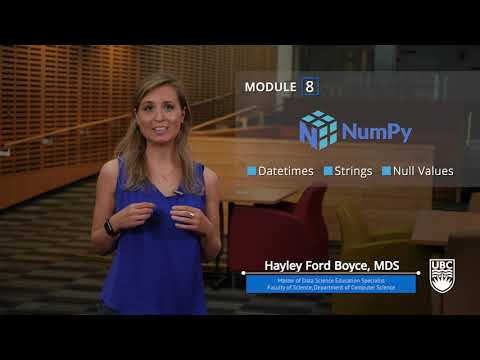

In [30]:
from IPython.display import YouTubeVideo
YouTubeVideo('PCBPzCFQwHs', width=854, height=480)